# HandsOn - Task

### 1. Create a machine learning model for predicting Mpg from all the input features in the data.

1. EDA
    - Preview Data
    - Check total number of enteries and column types
    - Check any data entry 
    - Check any null types 
    - Check duplicate enteries
    - Data Cleaning and Preprocessing
    - Plot count distribution of categorical data
    - Plot distribution of numerical data (univariate and pariwise joint distribution)
    
2. Splitting data for features to test and value to deduce
3. Splitting data for training and testing
4. Build ML Model
5. Equation of line
6. Model Evaluation

### 1. EDA - Exploratory Data Analysis

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import seaborn as sns

### 1.1 Preview Data

In [251]:
# Import the data
df1 = pd.read_csv('data/auto-mpg.csv')
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 1.2 Check total number of enteries and column types

In [252]:
# Descriptive Statistics
df1.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Observation #1

In the observation we can see that dType of **horse** is object whereas it should be either float64 or int64 type. So either it contains null type or some string as '?'. We need to identify it and clean it.

Since it non-null count is already zero for all columns so most probably it will be some string or '?'. Let's check for question mark

### 1.3  Check any data entry 

In [254]:
# Number of rows that contains the '?' as the missing data value.
i = df1.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?'))
c = i.any(axis=1).sum()



print (f'Number of rows containing "?" : {c}')

Number of rows containing "?" : 6


### Observation #2

We can see that total 6 rows contains '?'. We need to clean them before we process further

### 1.4 Data Cleaning - Clean the rows containing '?' 

In [255]:
data = df1[(df1 != '?').all(axis=1)]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [256]:
# Let's check if still has any rows containing the '?'

ii = data.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?'))
cc = ii.any(axis=1).sum()
print (f'Number of rows containing "?" : {cc}')

Number of rows containing "?" : 0


### 1.5 Check any null types 

Although we now that null count is zero. Still it is good practice to verify it once again.

In [257]:
# missing value imputation
# generate preview of entries with null values
if data.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(data[data.isnull().any(axis=1)].head(3))
    missingno.matrix(data)
    plt.show()
else:
    null_records = data.isnull().sum()
    print("No Null Values")
    print("**************")
    print(null_records)

No Null Values
**************
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


### Observation #3  

Null counts are zero. So no cleaning is required. Next step is to check for duplicate entries. 

### 1.6 Check for duplicate entries

In [258]:
# generate count statistics of duplicate entries
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Observation #4
No duplicate entries are there. So for this step also no cleaning is required.

### 1.7 Data Cleaning - for plotting charts and later on for building & testing the model

In [259]:
# Identify the categroical data set and update the data type for horsepower as for it we removed the question mark rows.

data_types_dict = {
    'displacement': 'float64', 
    'horsepower': 'float64', 
    'cylinders': 'category', 
    'origin': 'category', 
    'model year': 'category'
}

data = data.astype(data_types_dict)
data.info()
data.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    category
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
dtypes: category(3), float64(4), int64(1), object(1)
memory usage: 23.6+ KB


392

### Observation #5
Data is cleaned, Dtypes are also set and number of entries are also correct. Now we can plot the data for categorical
features and for numerical values

### 1.8 Plot count distribution of categorical data

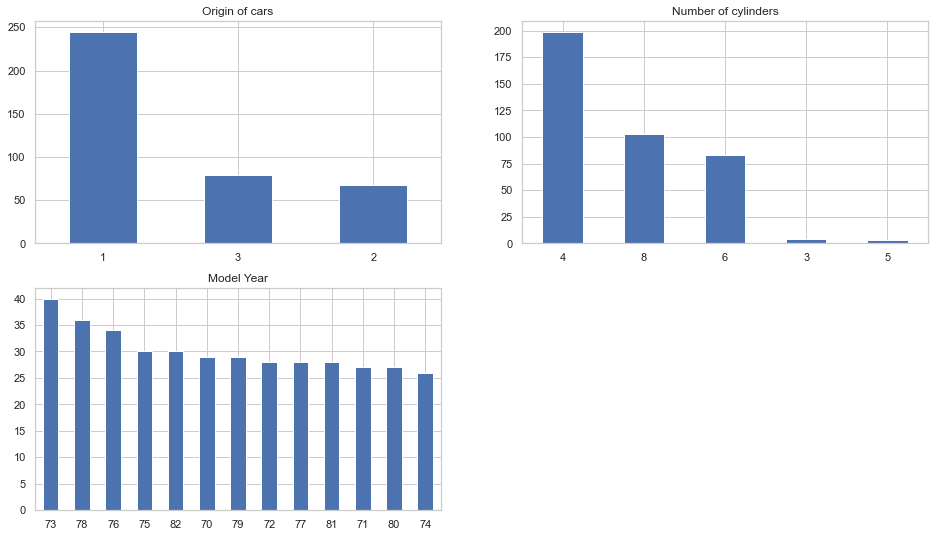

In [260]:
plt.subplot(221)
data['origin'].value_counts().plot(kind='bar', title='Origin of cars', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
data['cylinders'].value_counts().plot(kind='bar', title='Number of cylinders', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
data['model year'].value_counts().plot(kind='bar', title='Model Year', figsize=(16,9))
plt.xticks(rotation=0)

plt.show()

### Observation #6

The above graph shows that we have most cars from origin 1 or having 4 cylinders or made in year 73. 
Let's verify these hypothesis again by getting top 5 values for each categorical data

### 1.9 Identify the top values for caterigorical dataset

In [261]:
# Get the top 5 unique values for non-numerical data
"""Top 5 unique values for non-numerical data"""
cols = data.select_dtypes(include=['object', 'category']).columns
for col in cols:
    print('Top 5 unique values of "' + col  + '"')
    print(data[col].value_counts().reset_index().rename(columns={'index': col, col: "Count"})[:min(5, len(data[col].value_counts()))])
    print(" ")

Top 5 unique values of "cylinders"
  cylinders  Count
0         4    199
1         8    103
2         6     83
3         3      4
4         5      3
 
Top 5 unique values of "model year"
  model year  Count
0         73     40
1         78     36
2         76     34
3         75     30
4         82     30
 
Top 5 unique values of "origin"
  origin  Count
0      1    245
1      3     79
2      2     68
 
Top 5 unique values of "car name"
         car name  Count
0  toyota corolla      5
1     amc matador      5
2      ford pinto      5
3     amc gremlin      4
4   toyota corona      4
 


### 1.10 Plot distribution of numerical data (univariate and pariwise joint distribution)

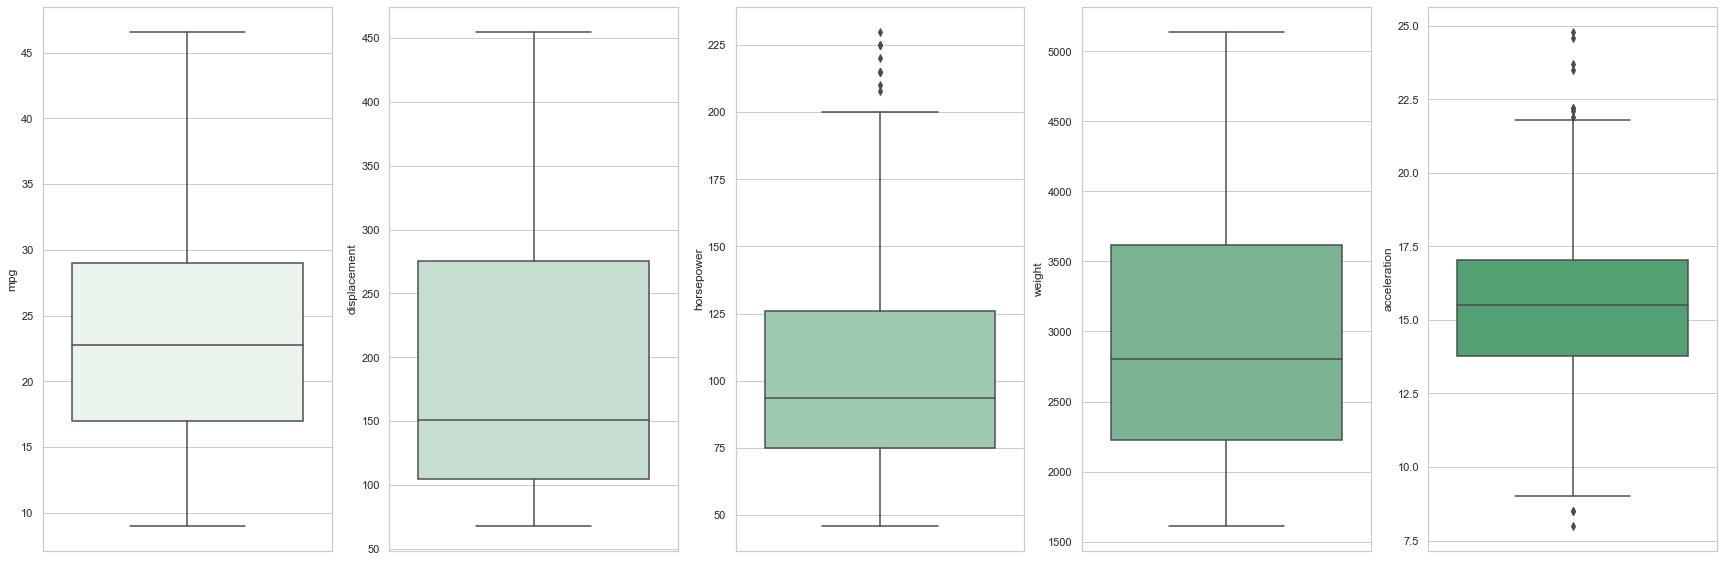

In [262]:
boxCols = data.select_dtypes(include='number').columns
figure = plt.figure(figsize=(30, 10))
figure.add_subplot(1, len(boxCols), 1)

# colorMap = sns.color_palette("crest")
colorMap = sns.light_palette('seagreen')
sns.set_theme(style="whitegrid")
for index, col in enumerate(boxCols):
    if index > 0: 
        figure.add_subplot(1, len(boxCols), index + 1)
    sns.boxplot(y=col, data=data, boxprops={'facecolor': colorMap[index]})

figure.tight_layout
plt.show()
    
    

### Observation #7

The boxplot states that we have outliners when horsepower is greater than 200 or accerleration is greater than 22

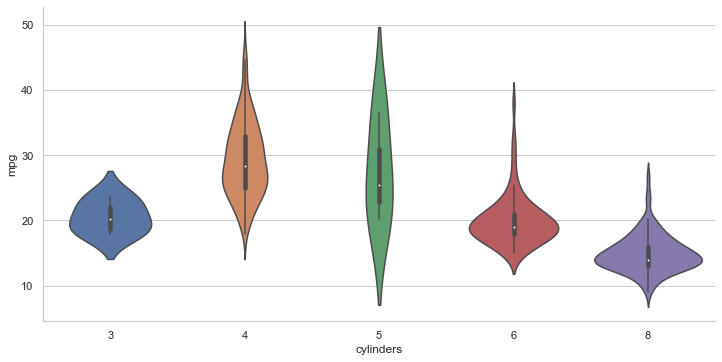

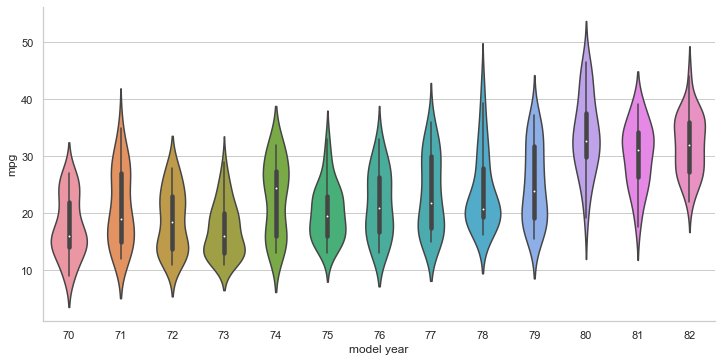

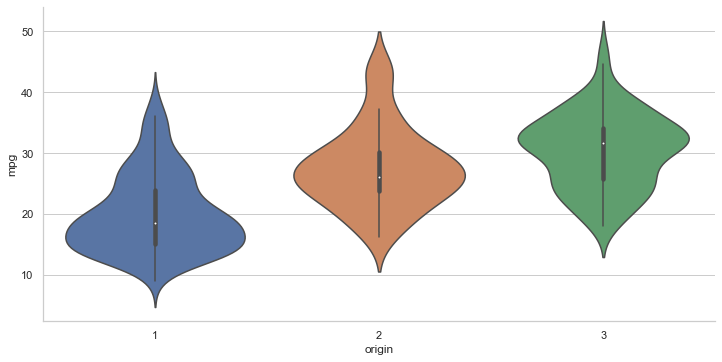

In [263]:
# Let's see the imapct of categorical data on the mpg (the value that we want to deduce)

for col in data.select_dtypes(include='category').columns:
    fig = sns.catplot(x=col, y=data['mpg'], kind='violin', data=data, height=5, aspect=2)
    fig.set_xticklabels(rotation=0)
    plt.show()


### Observation #8 

1. The violen plot of categroical data w.r.t to mpg shows that vehicles with 4 or 5 cylinders tends to have higher mpg.
2. Models of year 71, 78 and 80 focused on higher mpg
3. Vehicles from origin 2 or 3 are also focused on higher mpg

Let's verify this by plotting the pairplot chart

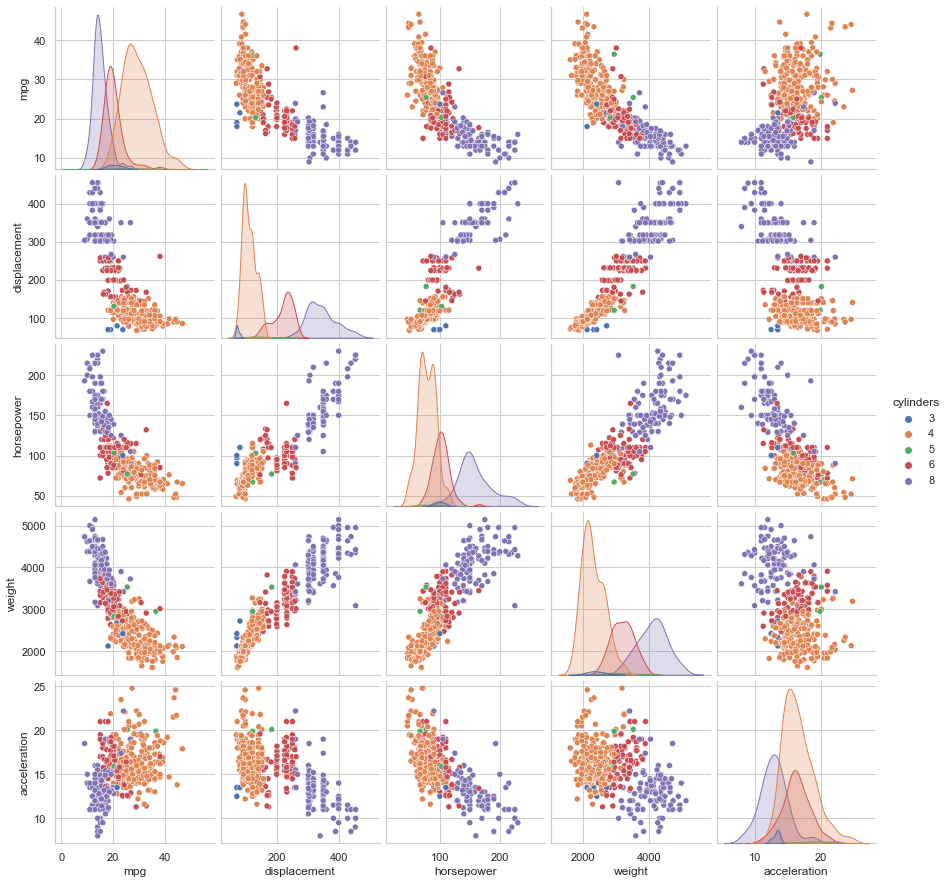

In [264]:
sns.pairplot(data.select_dtypes(include=np.number).join(data[['cylinders']]), hue='cylinders')

### Observation #9

The pairplot chart clearly shows that vechicles with 4 cylinders, low weight, less displacement, 
low horsepower are clear winner. However, the impact if accerleration is not much if it of type 4 cylinders

## 2. Splitting data for features to test and value to deduce

In [265]:
# Since this is linear regression problem with multiple variables. Let's re-analyze the variable set and get the our dataset
# in format of x (features) and y (result) set

#  #   Column        Non-Null Count  Dtype   
# ---  ------        --------------  -----   
#  0   mpg           392 non-null    float64 
#  1   cylinders     392 non-null    category
#  2   displacement  392 non-null    float64 
#  3   horsepower    392 non-null    float64 
#  4   weight        392 non-null    int64   
#  5   acceleration  392 non-null    float64 
#  6   model year    392 non-null    category
#  7   origin        392 non-null    category
#  8   car name      392 non-null    object  

## Observation
## -----------
##
## We have already observed in previous cells that mpg can be impaceted by both categroical and numerical data except by car name.
## So let's leave car name data aside and build our data set

x = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']].values
y = data['mpg'].values
print(f'x : {x.shape}, y: {y.shape}')

x : (392, 7), y: (392,)


## 3. Splitting data for training and testing

In [266]:
# Divide the data into training and test data
# train 70%
# test 30%

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y, train_size=0.7, random_state=0)
print(f'X_train : {X_train.shape}, X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}')


X_train : (274, 7), X_test: (118, 7), Y_train: (274,), Y_test: (118,)


## 4. Creating a ML Model

In [267]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_predict = regressor.predict(X_test)

In [268]:
regressor.intercept_

-14.462445921786195

In [269]:
regressor.coef_

array([-0.43095704,  0.01235764, -0.01253201, -0.006138  ,  0.06084649,
        0.71767163,  1.14356485])

## 5. Equation of line

```
y = mx + m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6 + c
```

And here 
1. y  = mpg
2. x  = cylinders
3. x1 = displacement
4. x2 = horsepower
5. x3 = weight
6. x4 = acceleration
7. x5 = model year
8. x6 = origin
9. c = -14.462445921786195

```
y = (-0.43095704 * x) +  (0.01235764 * x1) + (-0.01253201 * x2) + (-0.006138 * x3)  +  (0.06084649 * x4) + (0.71767163 * x5) + (1.14356485 * x6) -14.462445921786195 
```

## 6. Model Evaluation

In [270]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(Y_test,y_predict)
MSE = metrics.mean_squared_error(Y_test,y_predict)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(Y_test,y_predict)

print (f'MAE : {MAE}, MSE: {MSE}, RMSE: {RMSE}, R2: {R2}')

MAE : 2.5073142991993467, MSE: 11.125530446601516, RMSE: 3.335495532391179, R2: 0.8191428142279116


### Observation #10

It seems that model has 81.91% efficiency 